3. Знакомимся с новыми данными коронавирус.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
covid_data = pd.read_csv('data/covid_data.csv')
display(covid_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


In [4]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]

In [5]:
vaccinations_data.head()

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [6]:
covid_data = covid_data.groupby(['date', 'country'], as_index=False)[['confirmed', 'deaths', 'recovered']].sum()

In [7]:
covid_data['date'] = pd.to_datetime(covid_data['date'])
display(covid_data['date'] )

0       2021-01-01
1       2021-01-01
2       2021-01-01
3       2021-01-01
4       2021-01-01
           ...    
86780   2020-12-31
86781   2020-12-31
86782   2020-12-31
86783   2020-12-31
86784   2020-12-31
Name: date, Length: 86785, dtype: datetime64[ns]

In [8]:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
display(covid_data['active'])

0         7608.0
1        23501.0
2        29740.0
3          570.0
4         6017.0
          ...   
86780      105.0
86781    19421.0
86782       95.0
86783     1677.0
86784     2254.0
Name: active, Length: 86785, dtype: float64

In [9]:
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
display(covid_data)

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
15933,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16595,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16938,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17290,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

Задание 3.1

За какой период представлены данные в таблице covid_data? В качестве ответа введите даты в формате datetime (без указания времени).
Введите ответ в следующем формате (без пробелов): ГГГГ-ММ-ДД-ГГГГ-ММ-ДД

Подсказка (1 из 1): Для определения периода можно найти максимум и минимум в столбце date таблицы covid_data.

In [11]:
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['date'].max() - covid_data['date'].min()
print(f"Данные о заболеваемости предоставлены от {covid_data['date'].min()} до {covid_data['date'].max()}")

Данные о заболеваемости предоставлены от 2020-01-22 00:00:00 до 2021-05-29 00:00:00


Задание 3.2

За какой период представлены данные в таблице vaccinations_data ? В качестве ответа введите даты в
формате datetime без указания времени.
Введите ответ через дефис (например, 2020-01-01-2021-01-01).
Подсказка (1 из 1): Для определения интервала даты можно найти
максимум и минимум в столбца date таблицы vaccination_data .

In [12]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
vaccinations_data['date'].max() - vaccinations_data['date'].min()
print(f"Данные о вакцинации предоставлены от {vaccinations_data['date'].min()} до {vaccinations_data['date'].max()}")

Данные о вакцинации предоставлены от 2020-12-02 00:00:00 до 2021-09-06 00:00:00


Задание 3.3

С помощью метода merge() объедините таблицы covid_data и vaccinations_data по столбцам date и
country.
Тип объединения выставьте так, чтобы в результирующую таблицу попали только наблюдения за
период, вычисленный в задании 3.1. То есть в результирующую таблицу должны попасть все записи из таблицы covid_data и из её пересечения с vaccinations_data , но не более. Результат объединения
занесите в переменную covid_df.

Сохраните таблицу covid_df — она понадобится нам в следующем юните.

Сколько строк и столбцов в таблице covid_df ?
Введите ответ в виде двух чисел через дефис (например, 333-33): первое число — количество строк, второе число — количество
столбцов.

Подсказка (1 из 1): Для объединения по нескольким столбцам
передайте в параметр метода merge() список с именами ключей.

In [13]:
covid_df = covid_data.merge(vaccinations_data, on=['date', 'country'], how='left')
covid_df.head()
print("Число строк:", covid_df.shape[0])
print("Число столбцов:", covid_df.shape[1])


Число строк: 86785
Число столбцов: 16


В получившейся в задании 3.3 таблице covid_df создайте признаки death_rate — общий процент
смертей среди зафиксированных случаев (летальность) и recover_rate — общий процент случаев
выздоровления. Данные характеристики рассчитайте как отношение числа смертей (deaths) и
числа выздоровлений (recovered) к числу зафиксированных случаев (confirmed) и умножьте
результаты на 100%.

In [14]:
covid_df['death_rate'] = covid_df['deaths']/covid_df['confirmed']*100
covid_df['recover_rate'] = covid_df['recovered']/covid_df['confirmed']*100
covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


Задание 3.4

Какова максимальная летальность в США (United States) за весь период? Ответ округлите до второго
знака после запятой.

In [15]:
round(covid_df[covid_df['country'] =='United States']['death_rate'].max(), 2)

7.19

Задание 3.5

Чему равен средний процент выздоровевших в России (Russia)? Ответ округлите до второго знака
после запятой.

In [16]:
round(covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean(), 2)

67.06

In [17]:
covid_df.to_csv('data/covid_df.csv') 

4. Графические возможности библиотеки Pandas

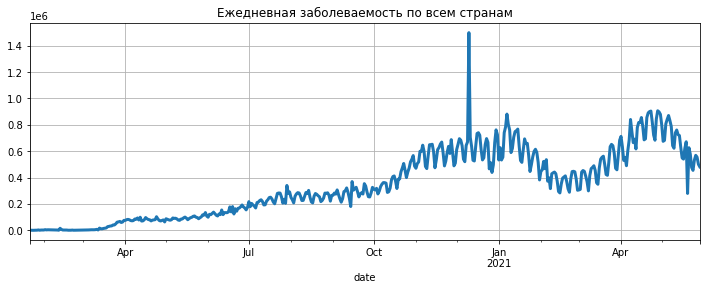

In [18]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
kind='line',
figsize=(12, 4),
title='Ежедневная заболеваемость по всем странам',
grid = True,
lw=3
);

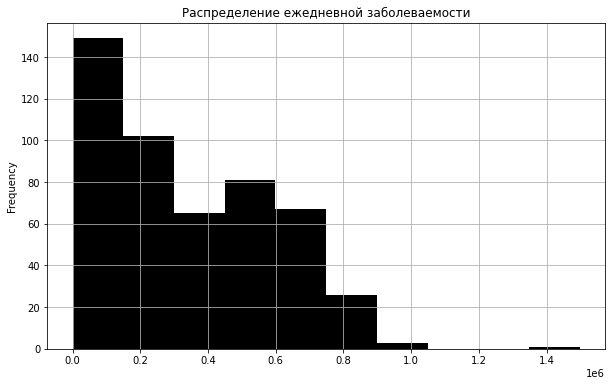

In [19]:
grouped_cases.plot(
    kind = 'hist',
    figsize = (10,6),
    title = 'Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins = 10
);

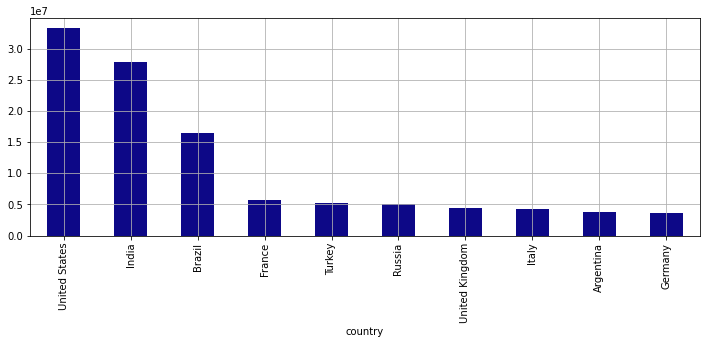

In [20]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind = 'bar',
    grid = True,
    figsize = (12,4),
    colormap = 'plasma'
);

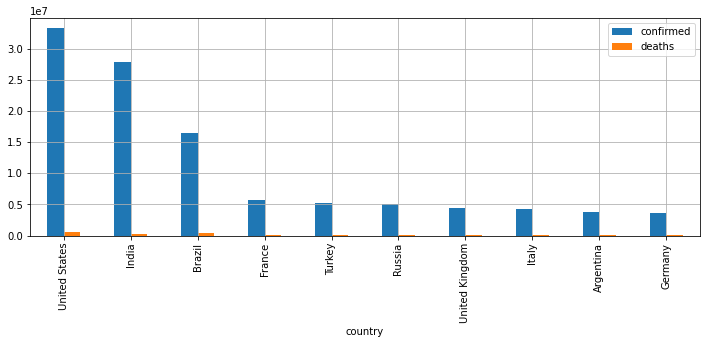

In [21]:
grouped_country = covid_df.groupby(['country'])[['confirmed','deaths']].last()
grouped_country = grouped_country.nlargest(10, columns =['confirmed'])
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12,4),
);

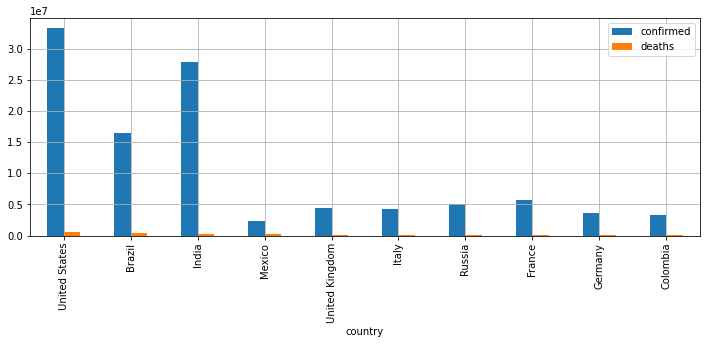

In [22]:
grouped_country = covid_df.groupby(['country'])[['confirmed','deaths']].last()
grouped_country = grouped_country.nlargest(10, columns =['deaths'])
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12,4),
);

Задание 4.1

За выбор типа визуализации в методе plot() библиотеки Pandas отвечает параметр:

kind

Задание 4.2

Загляните в документацию по методу plot() и найдите параметр, который отвечает за установку
названия оси ординат:

ylabel

Задание 4.3

С помощью какого из перечисленных ниже вариантов кода можно получить такой график?

Подсказка (1 из 4): Из названия оси ординат ясно, что график должен
быть построен для ежедневно фиксируемого числа смертей во всём
мире.
Подсказка (2 из 4): Чтобы построить график, необходимо
сгруппировать таблицу по дате и рассчитать сумму столбца
daily_deaths. Таким образом получится суммарное число смертей в
мире по дням.
Подсказка (3 из 4): Далее на сгруппированных данных необходимо
построить линейный график (параметр kind='line' ).
Подсказка (4 из 4): Для установки названий осей используются
параметры xlabel и ylabel .

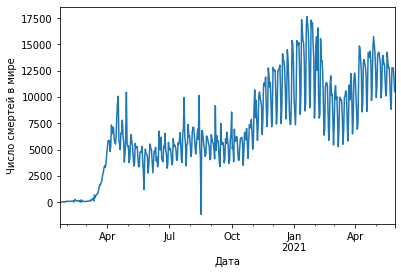

In [23]:
grouped_cases = covid_df.groupby('date')['daily_deaths'].sum()
grouped_cases.plot(kind='line',xlabel='Дата', ylabel='Число смертей в мире');

Задание 4.4

С помощью какого из перечисленных ниже вариантов кода можно построить столбчатую диаграмму
для пяти стран с наименьшим общим числом вакцинаций на последний день рассматриваемого
периода (total_vaccinations)?

В данном задании мы используем метод nsmallest(), который позволяет выбрать n наименьших
значений в Series, а также метод last(), с помощью которого можно получить первое непустое
значение в группах.

Подсказка (1 из 4): Сгруппируйте данные по странам.
Подсказка (2 из 4): Вычислите последнее зафиксированное число
заболевших ( last в столбце total_vaccinations).
Подсказка (3 из 4): Выберите ТОП-5 стран по минимальному
значению этого показателя с помощью метода nsmallest() .
Подсказка (4 из 4): Вызовите метод plot() с параметром kind='bar' .

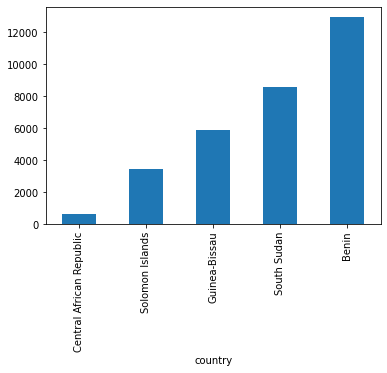

In [24]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

Задание 4.5

Постройте график из задания 4.4. В какой стране число вакцинированных наименьшее?

Центральноафриканская республика

5. Графические возможности библиотеки Matplotlib

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
plt.style.use('default')

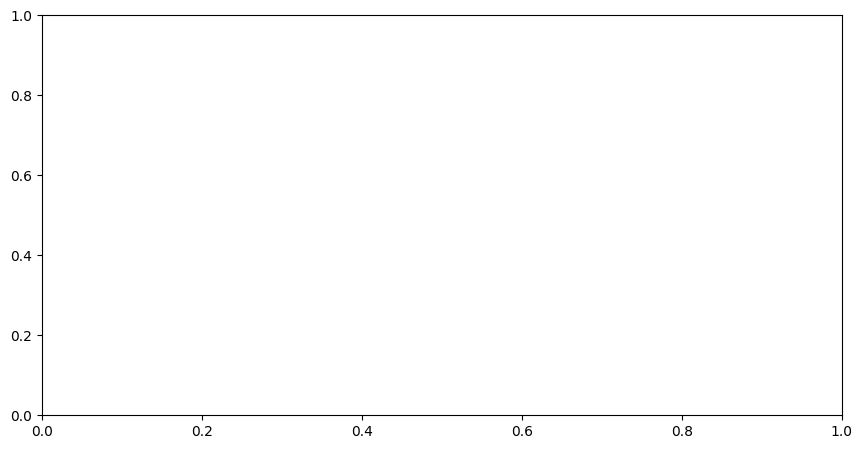

In [27]:
fig = plt.figure(figsize=(8,4))
axes = fig.add_axes([0,0,1,1])

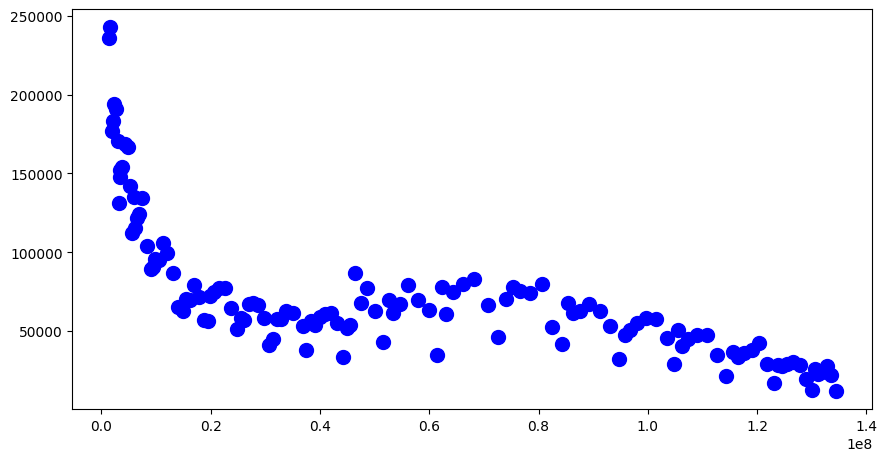

In [28]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8,4))
axes = fig.add_axes([0,0,1,1])
axes.scatter(
    x = us_data['people_fully_vaccinated'],
    y = us_data['daily_confirmed'],
    s=100,
    marker = 'o',
    c= 'blue'
);

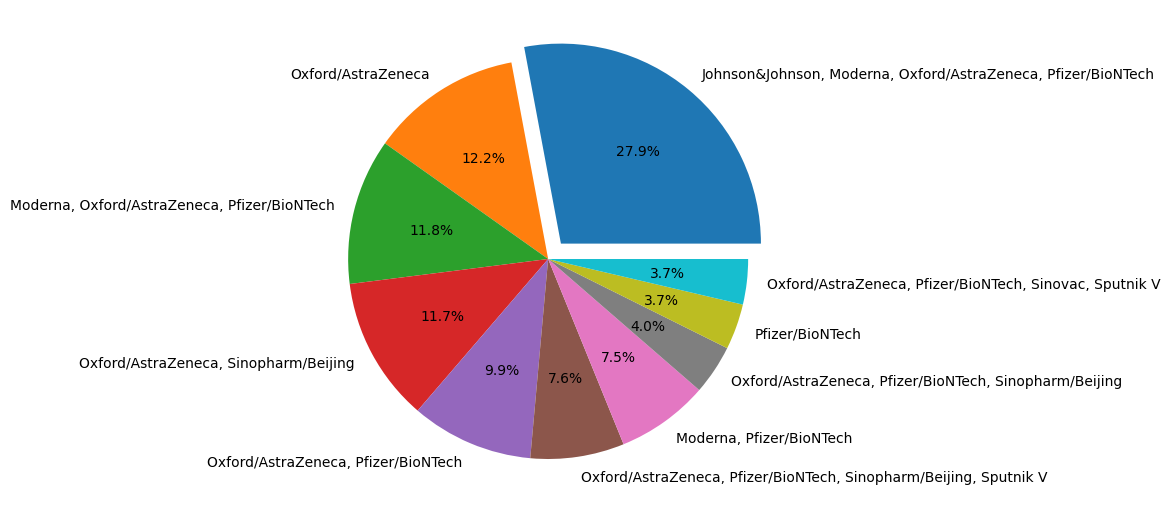

In [29]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    vaccine_combinations,
    labels = vaccine_combinations.index,
    autopct = '%.1f%%',
    explode = [0.1,0,0,0,0,0,0,0,0,0]
);

In [30]:
combination_not_nan = covid_df.dropna(subset=['vaccines'])

In [31]:
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last()

In [32]:
display(combination_last)

country
Afghanistan    Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...
Albania        Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...
Algeria         Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V
Andorra                      Oxford/AstraZeneca, Pfizer/BioNTech
Angola                                        Oxford/AstraZeneca
                                     ...                        
Venezuela          Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V
Vietnam        Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...
Yemen                                         Oxford/AstraZeneca
Zambia                     Oxford/AstraZeneca, Sinopharm/Beijing
Zimbabwe       Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...
Name: vaccines, Length: 174, dtype: object

In [33]:
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(','))

In [34]:
vaccines_dict = {}
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество

In [35]:
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]

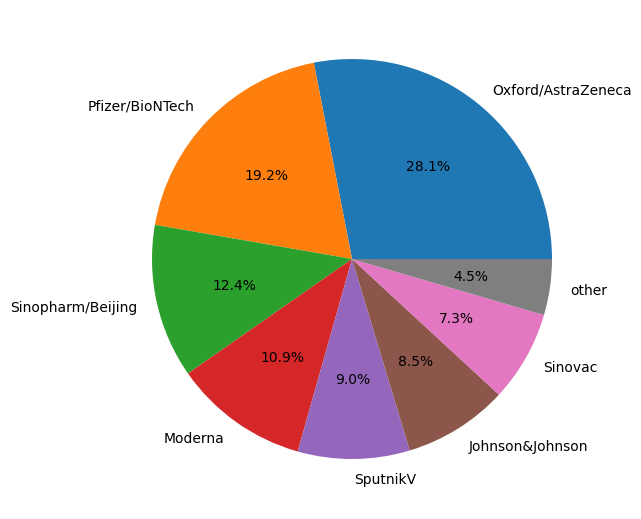

In [36]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
vaccines,
labels=vaccines.index,
autopct='%.1f%%',
);

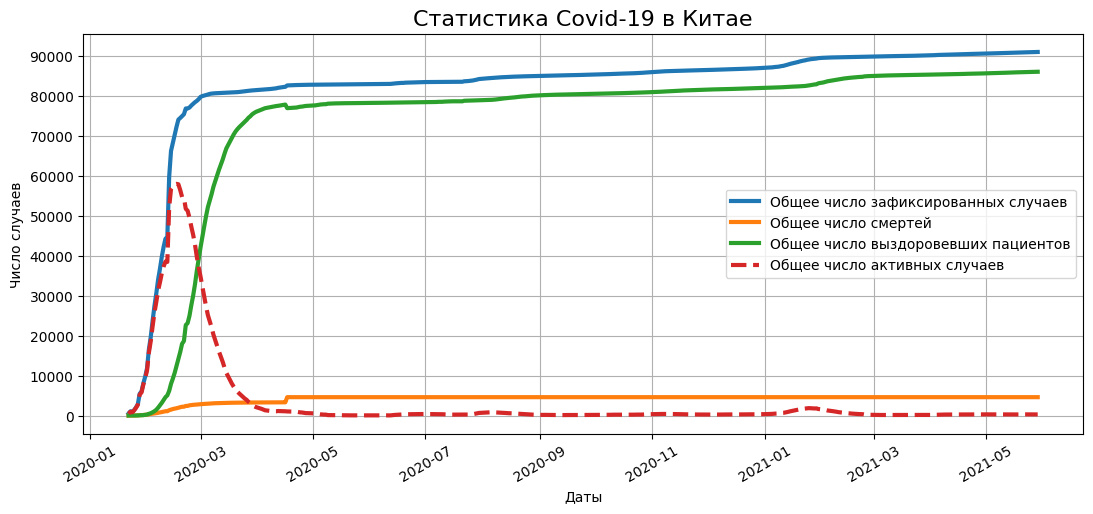

In [37]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered' ]].sum()
#визуализация графиков
fig = plt.figure(figsize=(10,4))
axes = fig.add_axes([0,0,1,1])
axes.plot(china_grouped['confirmed'], label = 'Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')
#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

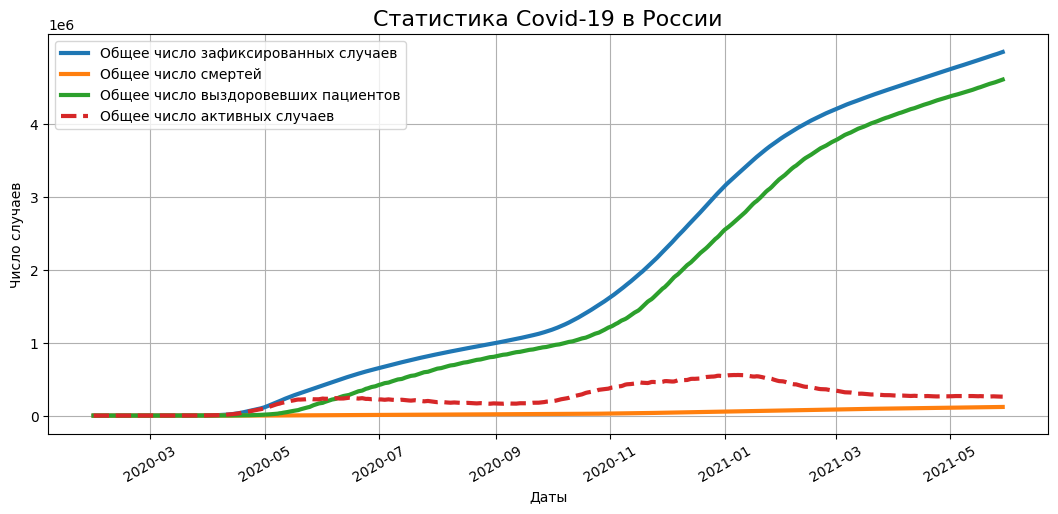

In [38]:
rus_data = covid_df[covid_df['country'] == 'Russia']
rus_grouped = rus_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered' ]].sum()
#визуализация графиков
fig = plt.figure(figsize=(10,4))
axes = fig.add_axes([0,0,1,1])
axes.plot(rus_grouped['confirmed'], label = 'Общее число зафиксированных случаев', lw=3)
axes.plot(rus_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(rus_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(rus_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')
#установка параметров отображения
axes.set_title('Статистика Covid-19 в России', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 5000000, 1000000)) #странно, правда?
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

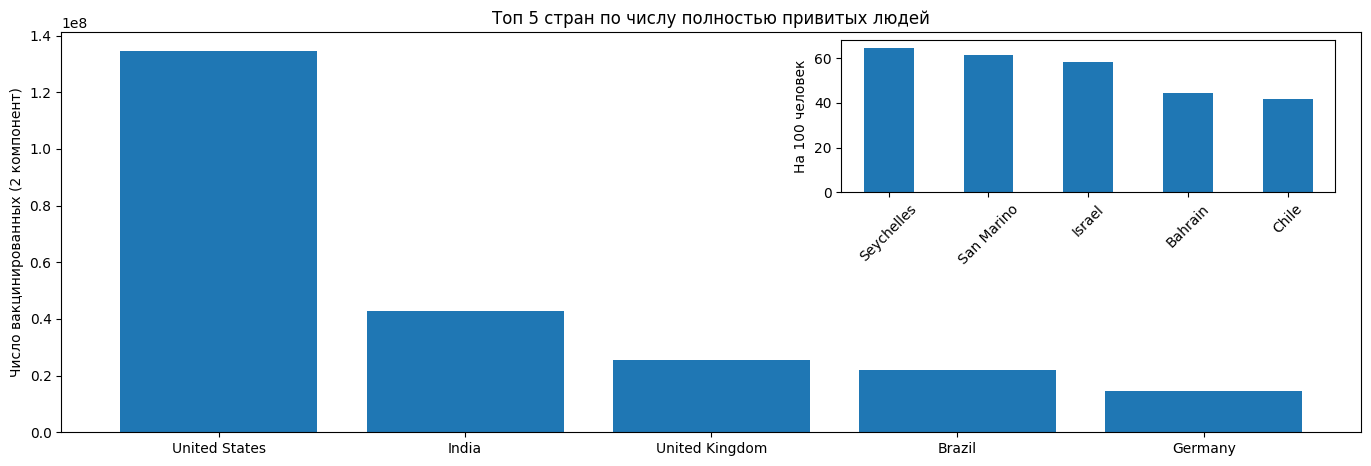

In [39]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest()
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)
#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0,0,1,1])
main_axes.bar(x=vacc_country.index,height=vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)');
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')
#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6,0.6,0.38,0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height=vacc_country_per_hundred,width = 0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

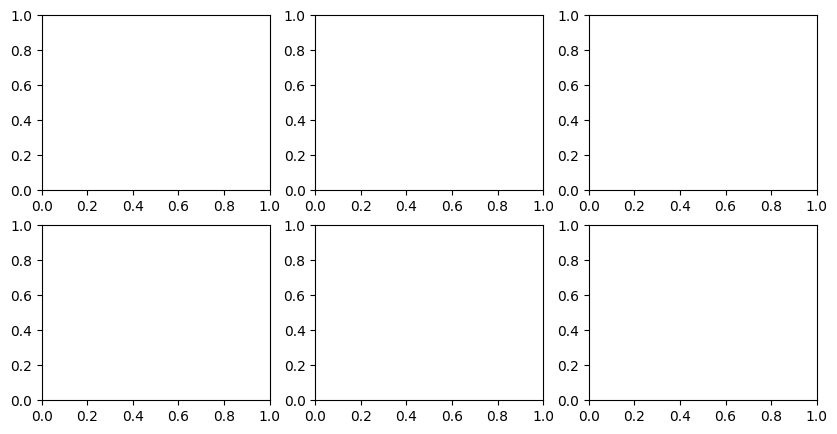

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,5))

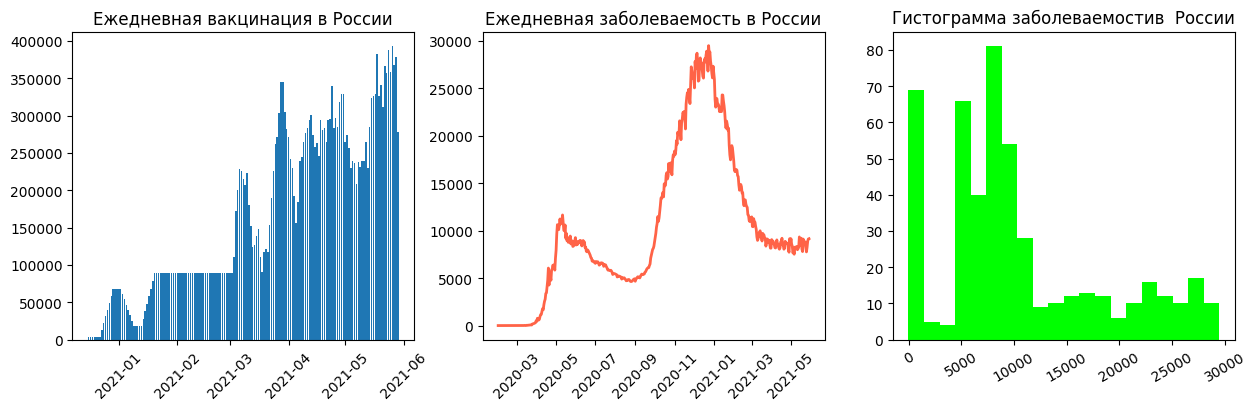

In [41]:
russia_data = covid_df[covid_df['country'] == 'Russia']
# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
# столбчатая диаграмма
axes[0].bar(
    x = russia_data["date"],
    height = russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)
# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color = "tomato",
    lw = 2
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)
# гистограмма
axes[2].hist(
    x=rus_data["daily_confirmed"], label=['Число заболевших'], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемостив  России")
axes[2].xaxis.set_tick_params(rotation = 30)

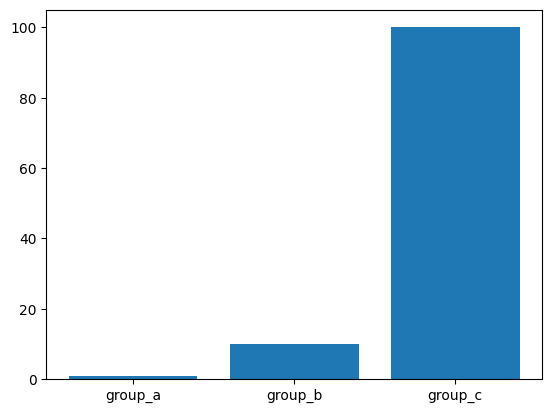

In [42]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
plt.bar(names, values)
plt.show()

Задание 5.1

Выберите основные объекты в библиотеке Matplotlib при использовании объектно-ориентированного
режима:

Фигуры (холсты) и координатные плоскости

Задание 5.2

Соотнесите методы объекта axes и графики, которые они строят (при возникновении
затруднений обратитесь к документации).

axes.hist() Гистограмма
axes.bar() Столбчатая диаграмма
axes.plot() Линейный график
axes.scatter() Диаграмма рассеяния
axes.box() Коробчатая диаграмма



Задание 5.3

Соотнесите методы объекта axes и параметры, которые эти методы регулируют:

axes.set_title() Название графика
axes.set_xlabel() Название оси абсцисс
xes.xaxis.set_tick_params() Параметры отметок на оси абсцисс
axes.set_ylabel() Название оси ординат
axes.legend() Легенда
axes.grid() Сетка на графике


Задание 5.4

По какому параметру отличаются друг от друга представленные ниже графики?

ncolumns

Задание 5.5

Дан код для отрисовки основной системы координат:

fig = plt.figure(figsize=(13, 4))

main_axes = fig.add_axes([0, 0, 1, 1])

Выберите правильный набор параметров, позволяющих разместить вспомогательную ось так, как
показано на заготовке графика ниже.

Подсказка (1 из 2): Из размещения главной и вспомогательной
систем координат ясно, что вспомогательная смещена на 20 % вверх
и на 20 % влево относительно главной.

Подсказка (2 из 2): Ширина и высота вспомогательной системы
координат занимает 60 % от ширины и высоты главной.

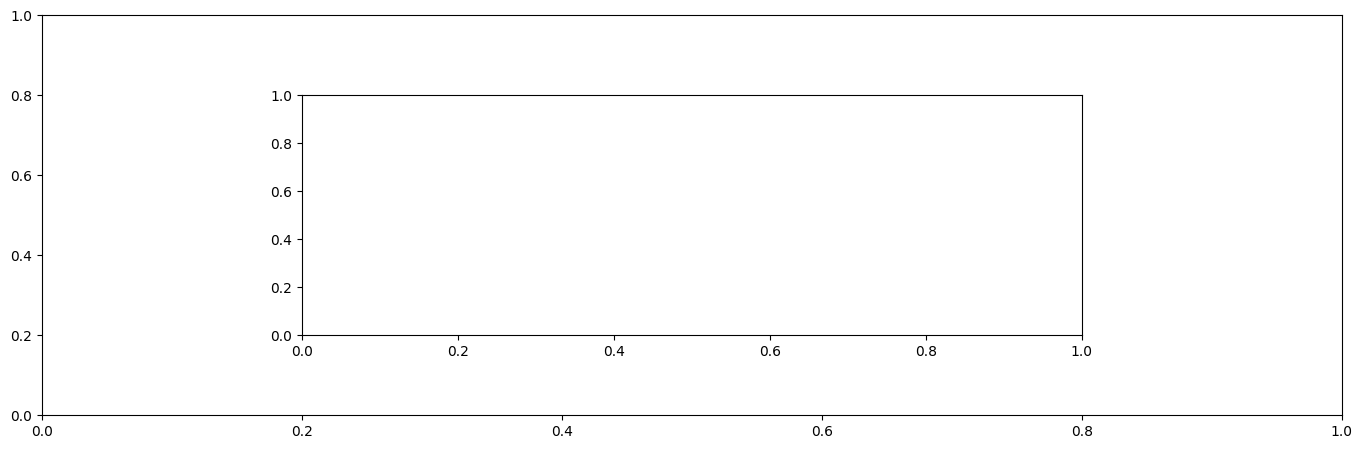

In [43]:
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
insert_axes = fig.add_axes([0.2, 0.2, 0.6, 0.6])

Задание 5.6

Выберите вариант кода, который позволит построить приведённый ниже график (посмотрите в
документации параметры объекта figure, которые позволяют раскрашивать части фигуры).
Подсказка (1 из 2): Чтобы построить такой график, необходимо

сгруппировать данные по датам и вычислить суммарное ежедневно
фиксируемое количество вакцинированных людей по всем странам.

Подсказка (2 из 2): Для раскрашивания обрамления фигуры
необходимо выставить значение параметра facecolor на 'lightgreen'
(светло-зелёный цвет). Параметр edgecolor отвечает за расцветку
внутреннего графика.

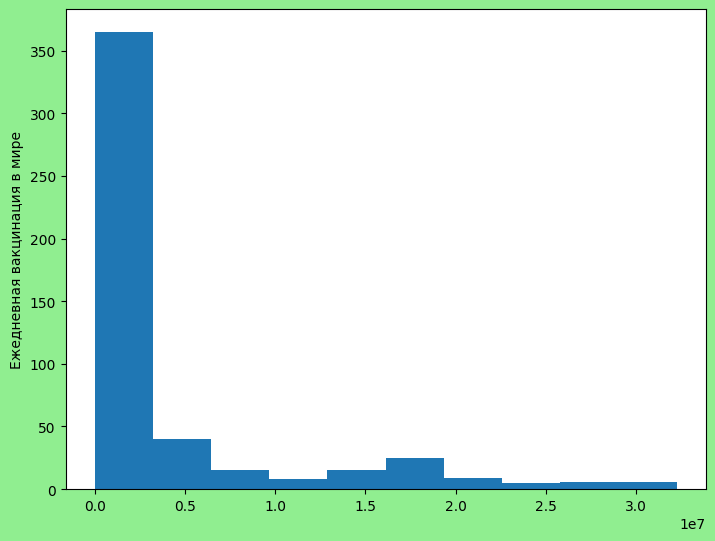

In [44]:
fig = plt.figure(facecolor='lightgreen')
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(covid_df.groupby('date')['daily_vaccinations'].sum())
axes.set_ylabel('Ежедневная вакцинация в мире');

Задание 5.7

Какое название лучше всего подойдёт графику, который строит код ниже?

Подсказка (1 из 1): Данные группируются по признаку страны, и
рассчитывается последнее значение общего числа сделанных
прививок в каждой стране. Далее выбираются пять стран, где
значение этого показателя наибольшее. На основе этих данных
строится столбчатая диаграмма.

ТОП-5 стран по общему числу сделанных прививок

<BarContainer object of 5 artists>

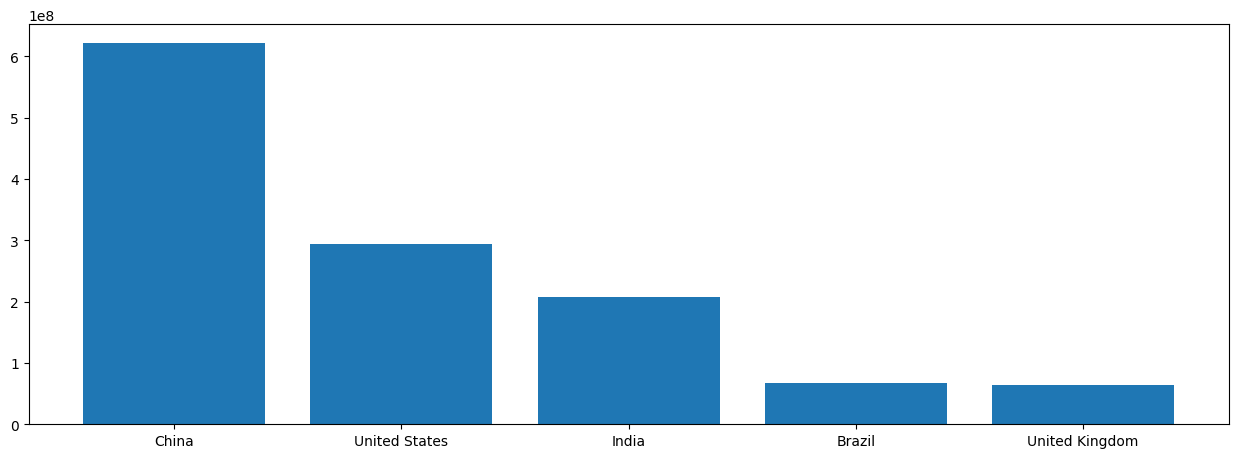

In [45]:
v = covid_df.groupby(['country'])['total_vaccinations'].last().nlargest(5)
fig = plt.figure(figsize=(12, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x=v.index,height=v)

Задание 5.8

Подумайте (или посмотрите в документации), по каким индексам надо обратиться к списку осей axes ,
полученному с помощью метода subplots() , чтобы построить такой график:

Подсказка (1 из 1): Метод subplots() возвращает фигуру и список из
координатных плоскостей. Если число строк или столбцов больше 1,
то возвращается вложенный список. По первому индексу происходит
обращение к строкам таблицы, по второму индексу — к столбцам.

axes[3][2]

Проверка

In [47]:
import plotly
import plotly.express as px